2023-12-18 20:53:48 [INFO]	Use GPU


E1218 20:53:48.107419 13811 analysis_config.cc:121] Please use PaddlePaddle with GPU version.
--- Running analysis [ir_graph_build_pass]
I1218 20:53:48.122021 13811 executor.cc:187] Old Executor is Running.
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [matmul_v2_scale_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running 

2023-12-18 20:54:17 [INFO]	Finish
Inference completed successfully.


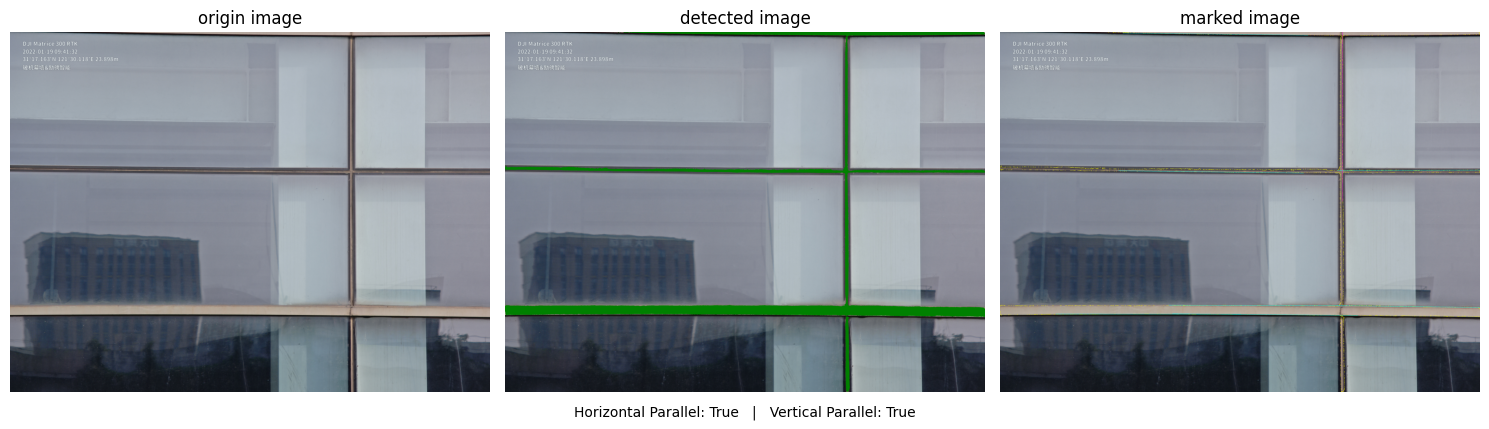

In [1]:
import subprocess
import os
import cv2
import matplotlib.pyplot as plt
import flat


def run_inference(image_path, save_dir):
    # 提取文件名（不包含扩展名）
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # 构建结果保存路径
    result_path = os.path.join(save_dir, f"{base_filename}.png")

    # 构建推理命令
    command = f"python deploy/python/infer.py --config inference_model/deploy.yaml --image_path {image_path} --save_dir {save_dir}"

    try:
        subprocess.run(command, shell=True, check=True)
        print("Inference completed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error during inference: {e}")

    # 返回结果保存路径
    return result_path

# 结构胶检测及平整度检测
def border_flat_detect(image_path, save_dir="output"):
    # 结构胶检测
    result_path = run_inference(image_path, save_dir)

    # 平整度检测
    original_image, overlay_result_on_original, marked_image, horizontal_parallel, vertical_parallel = flat.detect(
        image_path, result_path)

    # 返回原始图像，结构胶检测图像，边缘拟合后的图像，水平方向直线平行关系和竖直方向直线平行关系
    return original_image, overlay_result_on_original, marked_image, horizontal_parallel, vertical_parallel


# 测试部分
if __name__ == "__main__":
    # 设置图片路径和存储路径
    image_path = "2023_200003.jpg"
    # save_dir = "output"

    # 结构胶检测及平整度检测
    original_image, overlay_result_on_original, marked_image, horizontal_parallel, vertical_parallel = \
        border_flat_detect(image_path)

    # 显示检测结果
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 显示原始图像
    axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("origin image")
    axs[0].axis('off')

    # 显示结构胶检测的图像
    axs[1].imshow(cv2.cvtColor(overlay_result_on_original, cv2.COLOR_BGR2RGB))
    axs[1].set_title("detected image")
    axs[1].axis('off')

    # 显示边缘拟合后图像
    axs[2].imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
    axs[2].set_title("marked image")
    axs[2].axis('off')

    # 在图像下方添加横向和竖向线条是否平行的检测结果
    fig.text(0.5, 0.1, f'Horizontal Parallel: {horizontal_parallel}   |   Vertical Parallel: {vertical_parallel}',
             ha='center', va='center')

    plt.tight_layout()
    plt.show()
